In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
#import molplotly
from CombineMols.CombineMols import CombineMols
import QCflow
from QCflow.load_gaussian import *
from QCflow.energy_calculations import *
from QCflow.torsion_parser import *
from QCflow.find_torsion import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
g_16_df = pd.read_csv('../Data/Funnel/reorganized_dyads_data.csv')

In [5]:
g_16_df

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
0,0_76_single_A,COc1cc2cc[nH]c2c(C2:nc(C(F)(F)F)cc3nsnc:23)c1OC,-5.487701,-2.994533,2.493168,3.152695,0.673979,3.877650e+02,8.600330e+02,single,Trifloro,DHI,Unmethlyated,7 - DHI,single
1,0_84_single_A,COc1cc2cc[nH]c2c(C2:nncc3nsnc:23)c1OC,-5.269517,-2.994647,2.274870,3.169800,0.680468,3.944570e+02,6.528320e+02,single,none,DHI,Unmethlyated,7 - DHI,single
2,0_103_single_A,COc1cc2cc[nH]c2c(C2:scc3nc(C=O)cnc:23)c1OC,-5.244991,-2.861173,2.383818,3.196273,0.881659,4.204450e+02,5.486910e+02,single,carbonyl,DHI,Unmethlyated,7 - DHI,single
3,0_111_single_A,COc1cc2cc[nH]c2c(C2:scc3nc(C#N)cnc:23)c1OC,-5.368393,-2.979620,2.388773,3.200198,0.880582,3.736690e+02,5.649370e+02,single,cyanide,DHI,Unmethlyated,7 - DHI,single
4,0_184_single_A,COc1cc2cc[nH]c2c(C2:nc(C=O)cc3nonc:23)c1OC,-5.493250,-3.162633,2.330617,3.174516,0.722399,3.719630e+02,6.180350e+02,single,carbonyl,DHI,Unmethlyated,7 - DHI,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,9_179_thio_B,COc1cc(C2:c(C#N)ncc3nonc:23)sc1-c1c(OC)c(OC)cc...,-5.551930,-3.343242,2.208688,3.399234,0.695565,2.856280e+02,1.000000e+08,thio,cyanide,DHICA,Methylated,4 - DHICA,thio
3346,9_186_thio_B,COc1cc(C2:nc(C(F)(F)F)cc3nonc:23)sc1-c1c(OC)c(...,-5.533223,-3.142523,2.390701,3.366034,0.688077,1.000000e+08,4.349280e+02,thio,Trifloro,DHICA,Methylated,4 - DHICA,thio
3347,9_193_thio_B,COc1cc(C2:nc(C#N)cc3nonc:23)sc1-c1c(OC)c(OC)cc...,-5.624337,-3.316654,2.307683,3.398758,0.702382,1.000000e+08,1.000000e+08,thio,cyanide,DHICA,Methylated,4 - DHICA,thio
3348,9_214_thio_B,COc1cc(C2:occ3nc(S(=O)(=O)O)cnc:23)sc1-c1c(OC)...,-5.334971,-3.132469,2.202502,3.547168,0.703307,5.527350e+02,1.000000e+08,thio,Sulfonic Acid,DHICA,Methylated,4 - DHICA,thio


In [6]:
g_16_total = g_16_df[(g_16_df['Anionic Reorganisation Energy /eV'] <= 250) | (g_16_df['Cationic Reorganisation Energy /eV'] <= 250)]

In [7]:
g_16_df[(g_16_df['Anionic Reorganisation Energy /eV'] <= 350) | (g_16_df['Cationic Reorganisation Energy /eV'] <= 350)]

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
6,0_193_single_A,COc1cc2cc[nH]c2c(C2:nc(C#N)cc3nonc:23)c1OC,-5.555789,-3.220970,2.334819,3.187126,0.771071,347.835,6.059880e+02,single,cyanide,DHI,Unmethlyated,7 - DHI,single
12,0_42_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C#N)ccc3nsnc:23)c1OC,-5.316517,-2.889618,2.426899,3.175605,0.885665,258.391,6.059580e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
13,0_47_double_A,COc1cc2cc[nH]c2c(C=CC2:cc(C=O)cc3nsnc:23)c1OC,-5.373963,-2.901763,2.472200,3.217555,0.937171,322.270,5.497190e+02,double,carbonyl,DHI,Unmethlyated,7 - DHI,double
16,0_60_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C=O)ncc3nsnc:23)c1OC,-5.337355,-3.168408,2.168948,3.431391,0.907319,283.475,7.656150e+02,double,carbonyl,DHI,Unmethlyated,7 - DHI,double
22,0_69_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C#N)ncc3nsnc:23)c1OC,-5.412237,-3.167980,2.244257,3.376668,0.896438,259.878,8.696130e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,9_69_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ncc3nsnc:...,-5.458122,-3.360100,2.098021,3.456006,0.886977,303.700,1.000000e+08,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3308,9_152_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ccc3nonc:...,-5.521827,-3.221546,2.300280,3.250040,0.922221,337.071,4.380490e+02,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3321,9_179_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ncc3nonc:...,-5.602398,-3.499568,2.102829,3.422555,0.926597,339.994,4.354350e+02,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3342,9_79_thio_B,COc1cc(C2:nc(S)cc3nsnc:23)sc1-c1c(OC)c(OC)cc2c...,-5.317072,-2.856301,2.460771,3.511209,0.688843,311.636,1.000000e+08,thio,SH,DHICA,Methylated,4 - DHICA,thio


In [8]:
g_16_total

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
24,0_83_double_A,COc1cc2cc[nH]c2c(C=CC2:nc(C#N)cc3nsnc:23)c1OC,-5.504286,-3.094828,2.409458,3.424852,0.981490,247.537,5.414720e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
125,0_42_imine_A,COc1cc2cc[nH]c2c(C=NC2:c(C#N)ccc3nsnc:23)c1OC,-5.486237,-2.987613,2.498624,3.251524,0.998652,240.025,1.000000e+08,imine,cyanide,DHI,Unmethlyated,7 - DHI,imine
298,1_39_double_A,COc1cc2cc(C=CC3:c(Br)ccc4nsnc:34)[nH]c2cc1OC,-4.845734,-2.506316,2.339418,2.932517,0.999990,242.560,5.278390e+02,double,Br,DHI,Unmethlyated,2 - DHI,double
307,1_53_double_A,COc1cc2cc(C=CC3:cc(Br)cc4nsnc:34)[nH]c2cc1OC,-4.922054,-2.563587,2.358467,2.919469,0.999989,248.031,2.920650e+02,double,Br,DHI,Unmethlyated,2 - DHI,double
309,1_55_double_A,COc1cc2cc(C=CC3:cc(C#N)cc4nsnc:34)[nH]c2cc1OC,-5.032503,-2.856564,2.175939,3.013156,1.000000,227.058,2.778240e+02,double,cyanide,DHI,Unmethlyated,2 - DHI,double
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,5_98_thio_B,COc1cc2cc(-c3sc(C4:scc5ncc(C#N)nc:45)cc3OC)n(C...,-4.802063,-3.045528,1.756535,3.283970,0.764395,229.286,5.669530e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2912,5_152_thio_B,COc1cc2cc(-c3sc(C4:c(C#N)ccc5nonc:45)cc3OC)n(C...,-5.213893,-3.126043,2.087851,3.103068,0.753102,228.468,7.022170e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2934,5_179_thio_B,COc1cc2cc(-c3sc(C4:c(C#N)ncc5nonc:45)cc3OC)n(C...,-5.303554,-3.401269,1.902285,3.277188,0.770979,239.981,6.915170e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2948,5_193_thio_B,COc1cc2cc(-c3sc(C4:nc(C#N)cc5nonc:45)cc3OC)n(C...,-5.251536,-3.328745,1.922791,3.276676,0.775724,238.403,5.924700e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio


# Loading each run

In [9]:
data_runs_att_1 = {}
rdkit_smi_att_1 = {}
total_run_elites_1 = {}
for i in range(1, 45+1):
    df_run = pd.read_csv(f'attempt_1/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_1[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_1[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_1[str(i)] = smi_run

In [10]:
total_run_elites_1['45'][(total_run_elites_1['45']['Anionic Reorganisation Energy /eV'] <= 350) | (total_run_elites_1['45']['Cationic Reorganisation Energy /eV'] <= 350)]

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,Planarity,SA Score,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV
0,1_98_double_A,COc1cc2cc(C=CC3:scc4ncc(C#N)nc:34)[nH]c2cc1OC,-4.892931,-2.906988,1.985943,1.000000,3.196374,223.930,281.900
1,1_81_thio_B,COc1cc2cc(-c3sc(C4:nccc5nsnc:45)cc3OC)[nH]c2cc1OC,-4.633482,-2.747544,1.885938,1.000000,3.008207,230.590,288.141
2,1_98_thio_B,COc1cc2cc(-c3sc(C4:scc5ncc(C#N)nc:45)cc3OC)[nH...,-4.708228,-3.011082,1.697147,1.000000,3.231897,209.281,346.830
3,5_60_triple_A,COc1cc2cc(C#CC3:c(C=O)ncc4nsnc:34)n(C)c2cc1OC,-5.133854,-3.055298,2.078556,1.000000,3.351120,233.335,247.287
4,1_69_triple_A,COc1cc2cc(C#CC3:c(C#N)ncc4nsnc:34)[nH]c2cc1OC,-5.248261,-3.211917,2.036343,1.000000,3.309004,243.207,280.616
...,...,...,...,...,...,...,...,...,...
968,5_162_double_A,COc1cc2cc(C=CC3:cc(S)cc4nonc:34)n(C)c2cc1OC,-4.940976,-2.449160,2.491816,0.993856,3.195183,363.698,297.895
969,4_172_double_A,COc1cc2c(ccn2C)c(C=CC2:c(C(F)(F)F)ncc3nonc:23)...,-5.317213,-2.905060,2.412154,0.938959,3.256181,367.176,316.784
970,2_173_double_A,COc1cc2[nH]ccc2c(C=CC2:c(F)ncc3nonc:23)c1OC,-5.356630,-2.878554,2.478076,0.990739,3.210603,376.353,320.445
971,2_176_double_A,COc1cc2[nH]ccc2c(C=CC2:c(Br)ncc3nonc:23)c1OC,-5.326287,-2.885910,2.440376,0.972214,3.260649,368.756,308.590


In [11]:
data_runs_att_2 = {}
rdkit_smi_att_2 = {}
total_run_elites_2 = {}
for i in range(1, 45+1):
    df_run = pd.read_csv(f'attempt_2/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_2[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_2[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_2[str(i)] = smi_run

In [12]:
data_runs_att_3 = {}
rdkit_smi_att_3 = {}
total_run_elites_3 = {}
for i in range(1, 45+1):
    df_run = pd.read_csv(f'attempt_3/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_3[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_3[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_3[str(i)] = smi_run

In [13]:
data_runs_att_4 = {}
rdkit_smi_att_4 = {}
total_run_elites_4 = {}
for i in range(1, 45+1):
    df_run = pd.read_csv(f'attempt_4/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_4[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_4[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_4[str(i)] = smi_run

In [14]:
data_runs_att_5 = {}
rdkit_smi_att_5 = {}
total_run_elites_5 = {}
for i in range(1, 45+1):
    df_run = pd.read_csv(f'attempt_5/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_5[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_5[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_5[str(i)] = smi_run

In [15]:
total_run_elites_5['32'][(total_run_elites_5['32']['Anionic Reorganisation Energy /eV'] <= 350) | (total_run_elites_5['32']['Cationic Reorganisation Energy /eV'] <= 350)]

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,Planarity,SA Score,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV
0,1_98_double_A,COc1cc2cc(C=CC3:scc4ncc(C#N)nc:34)[nH]c2cc1OC,-4.892931,-2.906988,1.985943,1.000000,3.196374,223.930,281.900
1,1_81_thio_B,COc1cc2cc(-c3sc(C4:nccc5nsnc:45)cc3OC)[nH]c2cc1OC,-4.633482,-2.747544,1.885938,1.000000,3.008207,230.590,288.141
2,5_60_triple_A,COc1cc2cc(C#CC3:c(C=O)ncc4nsnc:34)n(C)c2cc1OC,-5.133854,-3.055298,2.078556,1.000000,3.351120,233.335,247.287
3,1_69_triple_A,COc1cc2cc(C#CC3:c(C#N)ncc4nsnc:34)[nH]c2cc1OC,-5.248261,-3.211917,2.036343,1.000000,3.309004,243.207,280.616
4,1_98_thio_B,COc1cc2cc(-c3sc(C4:scc5ncc(C#N)nc:45)cc3OC)[nH...,-4.708228,-3.011082,1.697147,1.000000,3.231897,209.281,346.830
...,...,...,...,...,...,...,...,...,...
898,4_172_double_A,COc1cc2c(ccn2C)c(C=CC2:c(C(F)(F)F)ncc3nonc:23)...,-5.317213,-2.905060,2.412154,0.938959,3.256181,367.176,316.784
899,2_176_double_A,COc1cc2[nH]ccc2c(C=CC2:c(Br)ncc3nonc:23)c1OC,-5.326287,-2.885910,2.440376,0.972214,3.260649,368.756,308.590
900,5_66_imine_A,COc1cc2cc(C=NC3:c(Br)ncc4nsnc:34)n(C)c2cc1OC,-5.253782,-2.882935,2.370848,0.940976,3.311679,413.185,286.177
901,4_175_double_A,COc1cc2c(ccn2C)c(C=CC2:c(S)ncc3nonc:23)c1OC,-5.137889,-2.682789,2.455101,0.968582,3.373647,371.892,334.802


# Matching functions

In [16]:
g_16_smi = dict(zip(g_16_total['Name'], g_16_total['SMILES']))
g_16_smi_canon = {k: Chem.CanonSmiles(v, useChiral=0) for k, v in g_16_smi.items()}

In [17]:
def match_to_g16(rdkit_smi, g_16_smi_canon):
    match_smi = {}
    for k, v in rdkit_smi.items():
        if k in g_16_smi_canon.keys():
            match_smi[k] = v
    return len(match_smi)

# Results

In [18]:
num_match_all_att_1 = {}
total_run_elites_att_1 = {}
percent_match_1 = {}
for i in range(1, 45+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_1[run]
    run_all_elites = total_run_elites_1[run]
    
    total_run_elites_att_1[run] = len(run_all_elites)
    num_match_all_att_1[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_1[run] = (num_match_all_att_1[run] / 133)

In [23]:
num_match_all_att_2 = {}
total_run_elites_att_2 = {}
percent_match_2 = {}
for i in range(1, 45+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_2[run]
    run_all_elites = total_run_elites_2[run]
    
    total_run_elites_att_2[run] = len(run_all_elites)
    num_match_all_att_2[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_2[run] = (num_match_all_att_2[run] / 133)

In [26]:
num_match_all_att_3 = {}
total_run_elites_att_3 = {}
percent_match_3 = {}
for i in range(1, 45+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_3[run]
    run_all_elites = total_run_elites_3[run]
    
    total_run_elites_att_3[run] = len(run_all_elites)
    num_match_all_att_3[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_3[run] = (num_match_all_att_3[run] / 133)

In [28]:
num_match_all_att_4 = {}
total_run_elites_att_4 = {}
percent_match_4 = {}
for i in range(1, 45+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_4[run]
    run_all_elites = total_run_elites_4[run]
    
    total_run_elites_att_4[run] = len(run_all_elites)
    num_match_all_att_4[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_4[run] = (num_match_all_att_4[run] / 133)

In [30]:
num_match_all_att_5 = {}
total_run_elites_att_5 = {}
percent_match_5 = {}
for i in range(1, 45+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_5[run]
    run_all_elites = total_run_elites_5[run]
    
    total_run_elites_att_5[run] = len(run_all_elites)
    num_match_all_att_5[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_5[run] = (num_match_all_att_5[run] / 133)

# Similarity %

In [ ]:
run_1_sim = pd.read_csv('../Data/GA/run_1/run_df.csv')
run_2_sim = pd.read_csv('../Data/GA/run_2/run_df.csv')
run_3_sim = pd.read_csv('../Data/GA/run_3/run_df.csv')
run_4_sim = pd.read_csv('../Data/GA/run_4/run_df.csv')
run_5_sim = pd.read_csv('../Data/GA/run_5/run_df.csv')

In [74]:
import matplotlib.pyplot as plt

# Generate a palette with different shades of grey
num_shades = 10  # Number of shades
grey_palette = [f'#{int(255 * (1 - i / (num_shades - 1))):02x}' * 3 for i in range(num_shades)]

In [75]:
grey = sns.color_palette("Greys", n_colors=10)
#bright_pal = sns.color_palette("bright")
colors = [grey.as_hex()[0], grey.as_hex()[3], grey.as_hex()[4], grey.as_hex()[8], grey.as_hex()[2]]

In [76]:
blues = sns.color_palette("Greens", n_colors=10)

In [77]:
blues

[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

In [78]:
width = 7 * 0.3937
height = 5 * 0.3937

/var/folders/_1/1l34t_9j7_7g2f00h546gntm0000gn/T/ipykernel_63930/2265708322.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


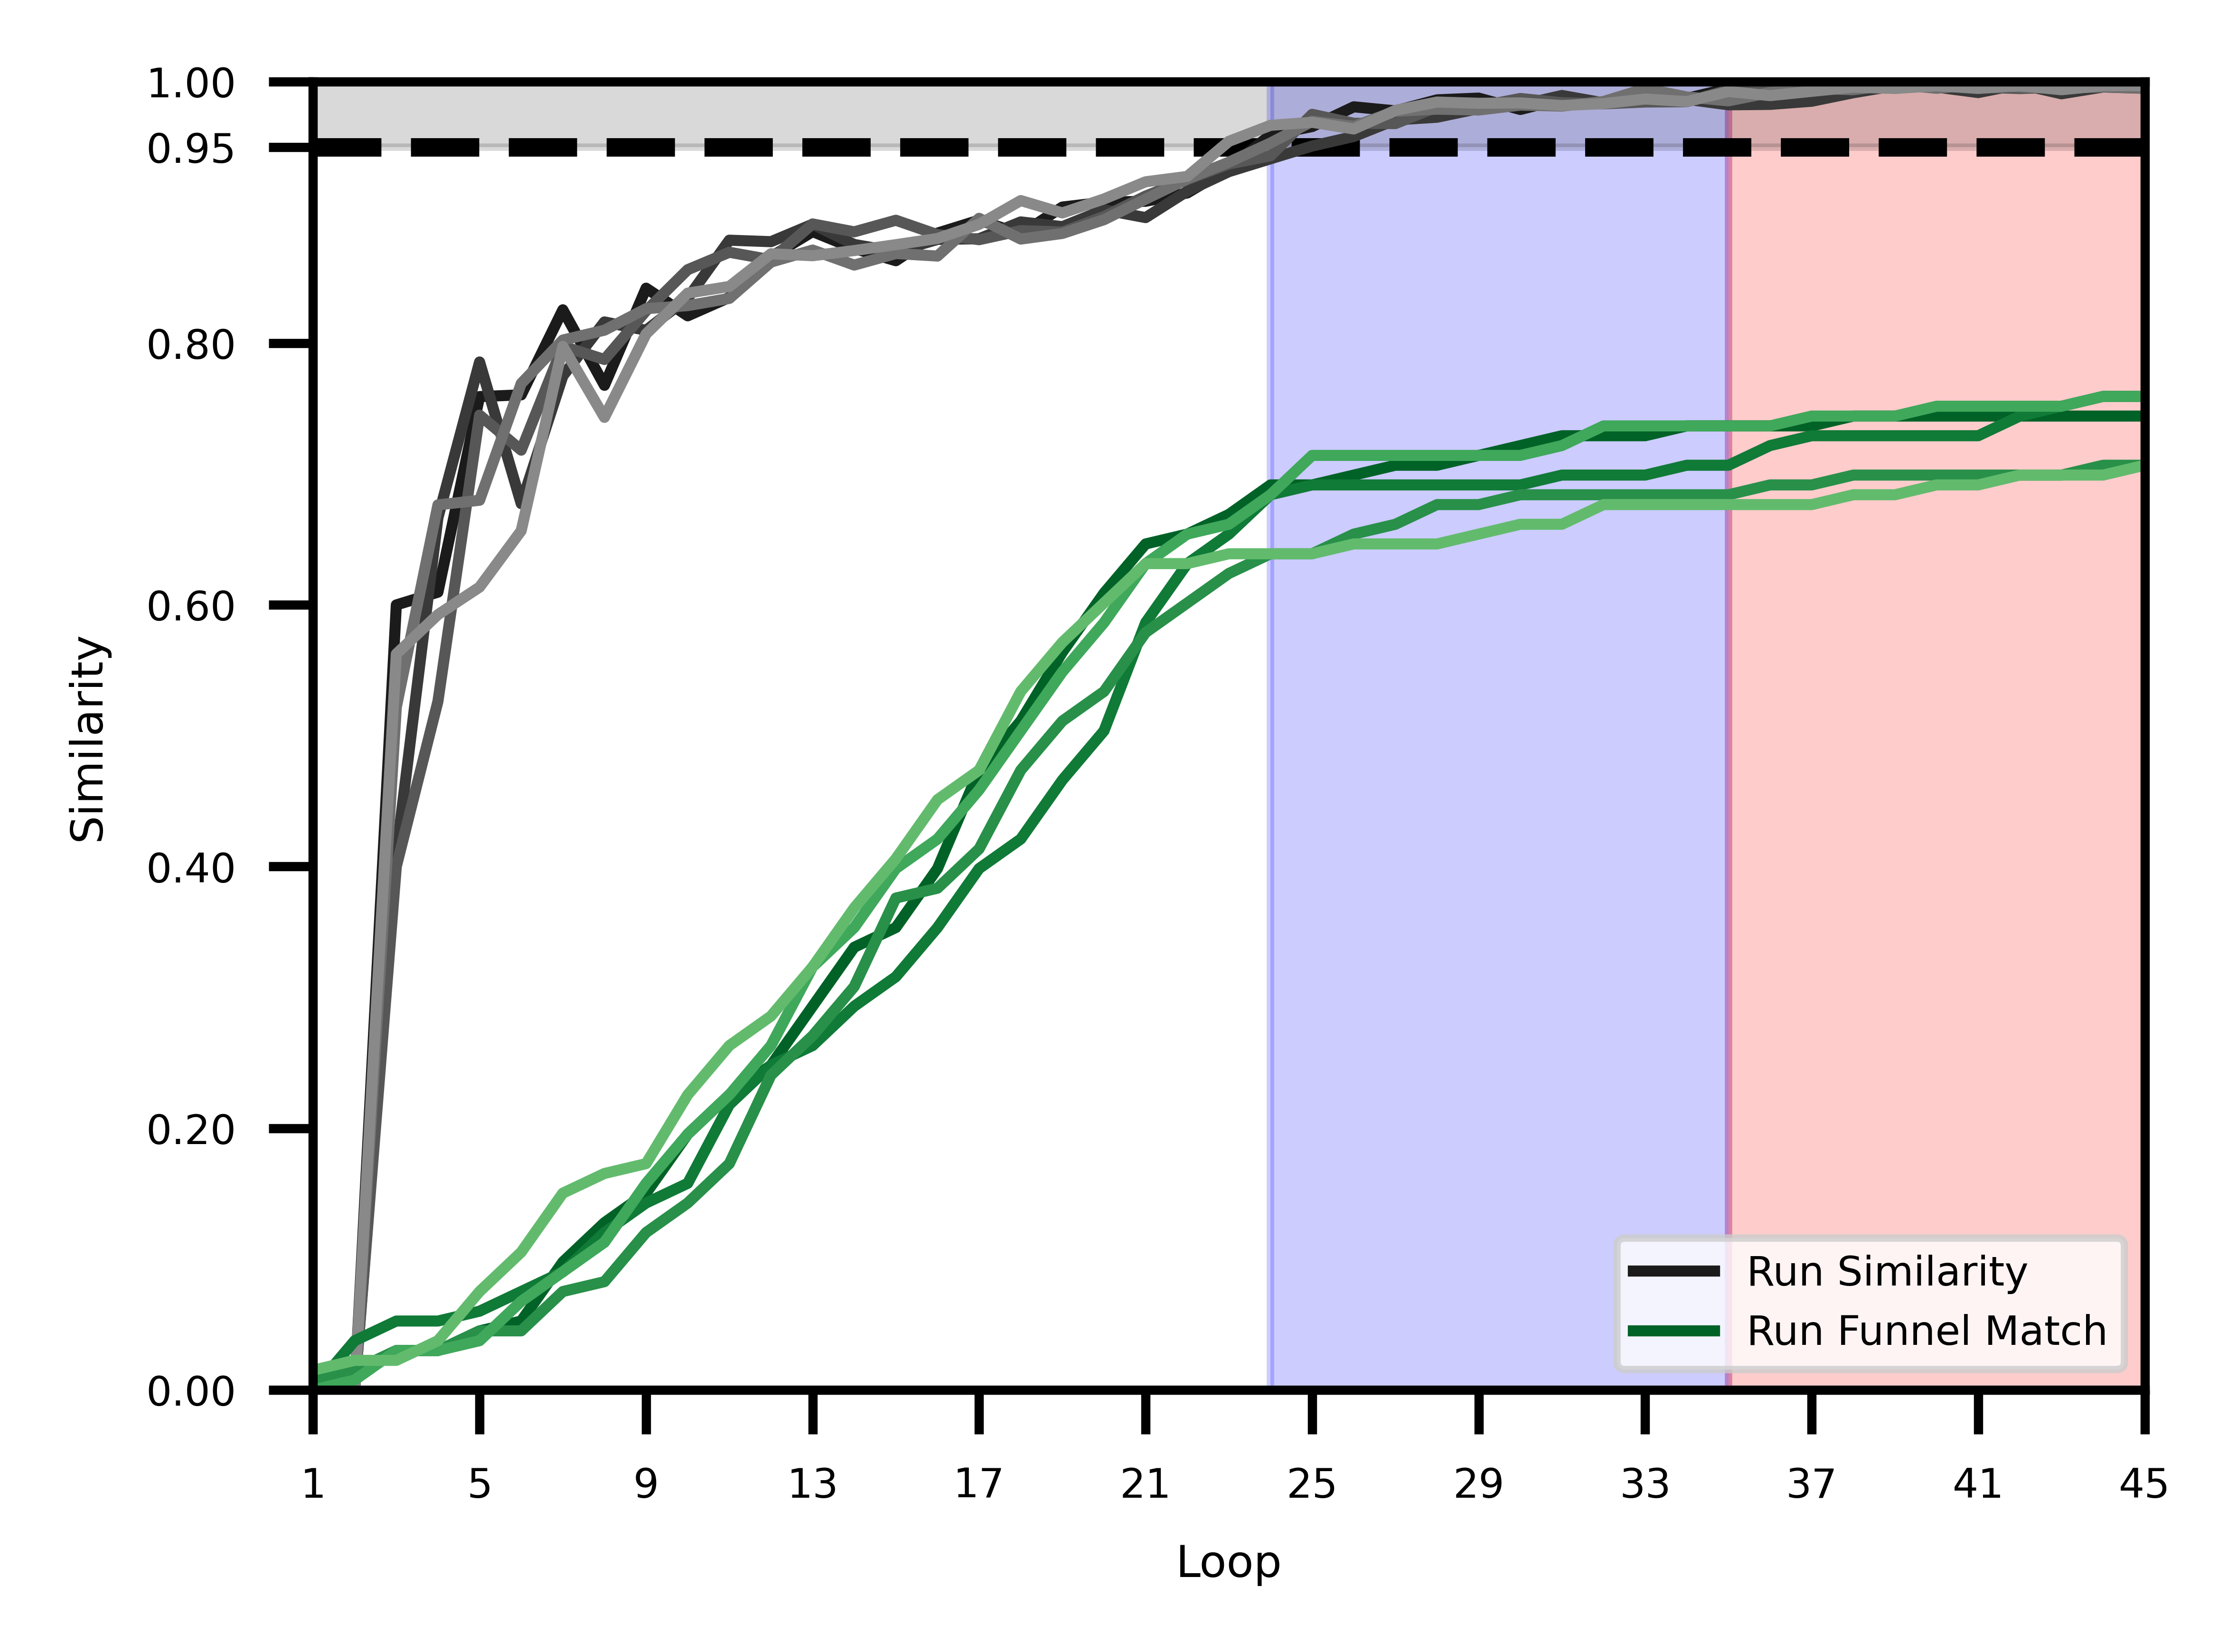

In [38]:
# Create the line plot
fig = plt.figure(figsize=(width, height), dpi=1400)
ax1 = fig.add_axes([0.1,0.1,1,1])
sns.set_context("paper", font_scale=0.5)
#fig, ax1 = plt.subplots(figsize=(9, 6))
# Increase line thickness by setting linewidth parameter
line_width = 5

# Plot y1, y2, and y3 on the left y-axis
#line5, = ax1.plot(x, y5, marker='x', linestyle='-.', color='orange', label='Molecules Matching in total λ Manual Set')
ax1.set_xlabel('Loop')
ax1.set_ylabel('Similarity')
#ax1.set_title('Genetic Algorithm Similarity Percentage')
ax1.set_ylim(0, 1)  # Set the y-axis range from 0 to 100
ax1.set_xlim(0, 44)  # Set the x-axis range from 1 to 46
ax1.set_xticks(range(0, len(run_1_sim['Name']), 4))
ax1.grid(False)
# Add a red box that covers x=23 to x=34
ax1.axvspan(23, 34, color='blue', alpha=0.2)
ax1.axvspan(34, 45, color='red', alpha=0.2)
# Create a secondary y-axis for y4
#ax2 = ax1.twinx()
# Add a horizontal line at y=95
ax1.axhline(y=0.95, color='black', linestyle='--', linewidth=2, label='y=95')
ax1.set_yticks(list(ax1.get_yticks()) + [0.95])
ax1.axhspan(0.95, 1, color='black', alpha=0.15)
line1, = ax1.plot(run_1_sim['Name'], run_1_sim['Similarity Percentage'], linestyle='-', color=grey[9], label='Run Similarity')
line2, = ax1.plot(run_2_sim['Name'], run_2_sim['Similarity Percentage'], linestyle='-', color=grey[8], label='Run 2 Similarity')
line3, = ax1.plot(run_3_sim['Name'], run_3_sim['Similarity Percentage'], linestyle='-', color=grey[7], label='Run 3 Similarity')
line4, = ax1.plot(run_4_sim['Name'], run_4_sim['Similarity Percentage'], linestyle='-', color=grey[6], label='Run 4 Similarity')
line5, = ax1.plot(run_5_sim['Name'], run_5_sim['Similarity Percentage'], linestyle='-', color=grey[5], label='Run 5 Similarity')

line6, = ax1.plot(list(percent_match_1.keys()), list(percent_match_1.values()), linestyle='-', color=blues[9], label='Run Funnel Match')
line7, = ax1.plot(list(percent_match_2.keys()), list(percent_match_2.values()), linestyle='-', color=blues[8], label='Run Funnel Match')
line8, = ax1.plot(list(percent_match_3.keys()), list(percent_match_3.values()), linestyle='-', color=blues[7], label='Run Funnel Match')
line9, = ax1.plot(list(percent_match_4.keys()), list(percent_match_4.values()), linestyle='-', color=blues[6], label='Run Funnel Match')
line10, = ax1.plot(list(percent_match_5.keys()), list(percent_match_5.values()), linestyle='-', color=blues[5], label='Run Funnel Match')

lines = [line1, line6]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right', bbox_to_anchor=(1, 0.0))

plt.tight_layout()
plt.savefig('GA_similarity_progress_uniform_colour_paper.png', dpi=1400, bbox_inches='tight')
plt.show()

/var/folders/_1/1l34t_9j7_7g2f00h546gntm0000gn/T/ipykernel_94385/3441672024.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


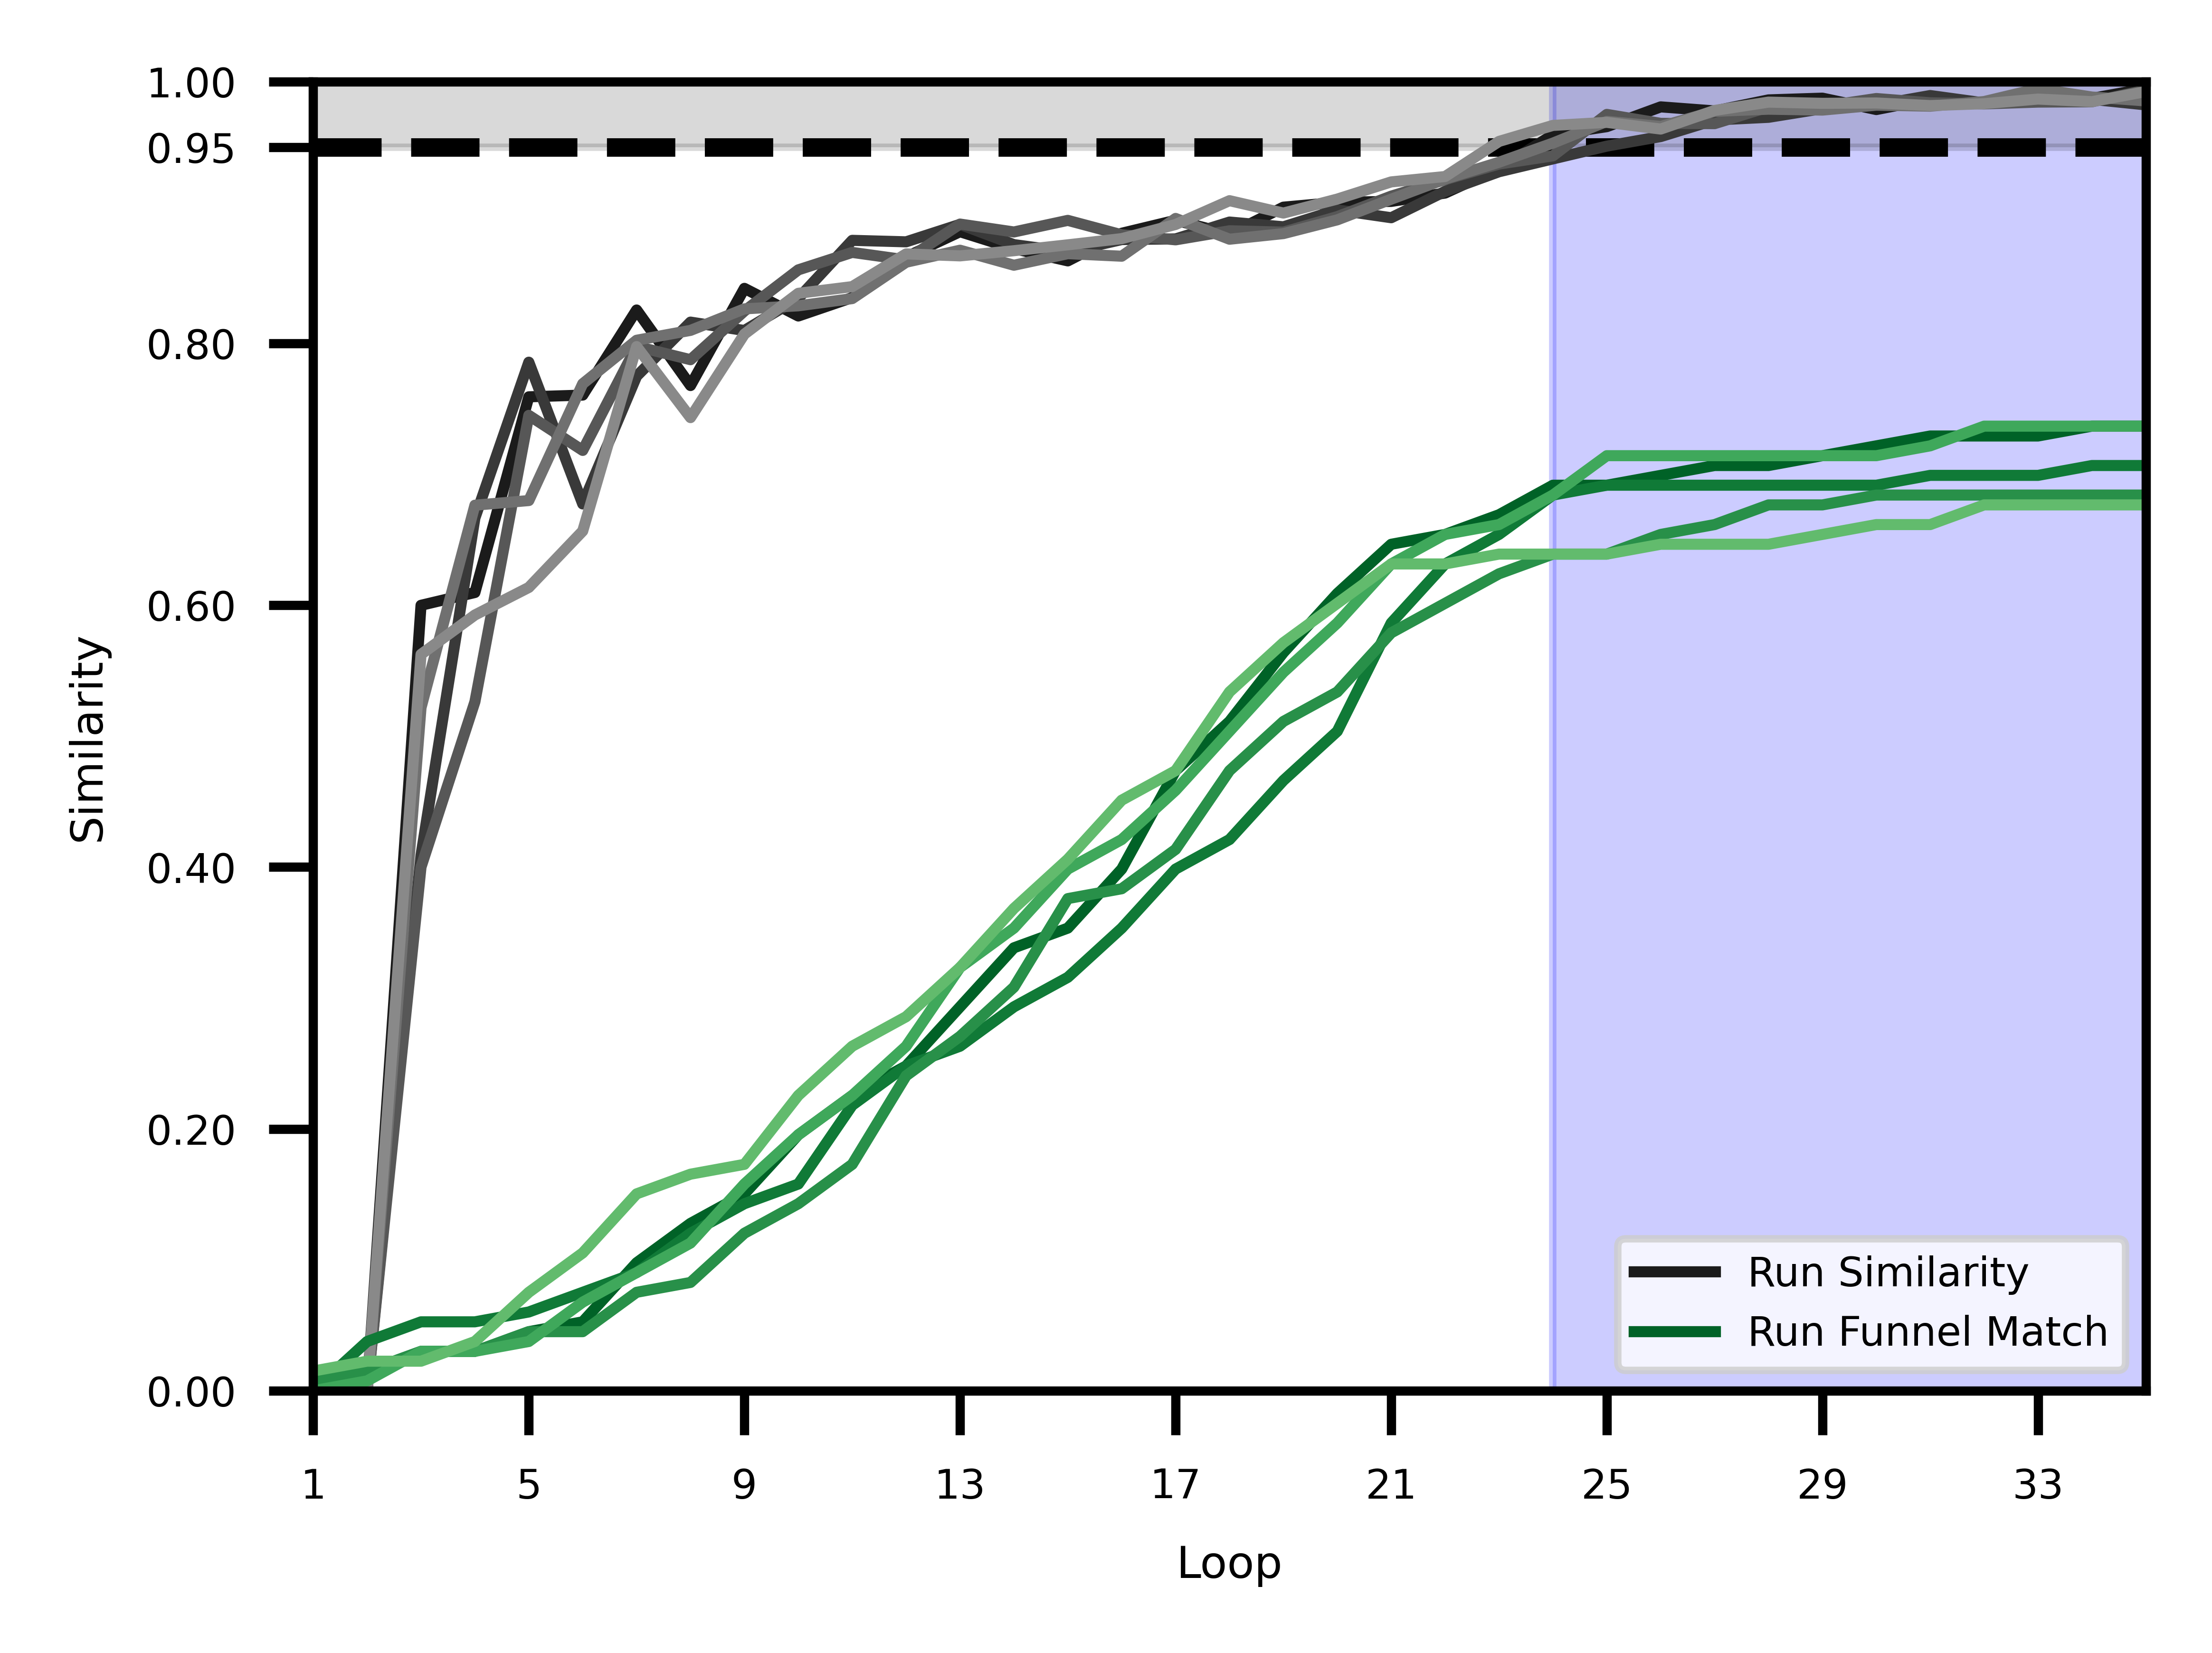

In [85]:
# Create the line plot
fig = plt.figure(figsize=(width, height), dpi=1400)
ax1 = fig.add_axes([0.1,0.1,1,1])
sns.set_context("paper", font_scale=0.5)
#fig, ax1 = plt.subplots(figsize=(9, 6))
# Increase line thickness by setting linewidth parameter
line_width = 5

# Plot y1, y2, and y3 on the left y-axis
#line5, = ax1.plot(x, y5, marker='x', linestyle='-.', color='orange', label='Molecules Matching in total λ Manual Set')
ax1.set_xlabel('Loop')
ax1.set_ylabel('Similarity')
#ax1.set_title('Genetic Algorithm Similarity Percentage')
ax1.set_ylim(0, 1)  # Set the y-axis range from 0 to 100
ax1.set_xlim(0, 34)  # Set the x-axis range from 1 to 46
ax1.set_xticks(range(0, 36, 4))
ax1.grid(False)
# Add a red box that covers x=23 to x=34
ax1.axvspan(23, 34, color='blue', alpha=0.2)
#ax1.axvspan(34, 45, color='red', alpha=0.2)
# Create a secondary y-axis for y4
#ax2 = ax1.twinx()
# Add a horizontal line at y=95
ax1.axhline(y=0.95, color='black', linestyle='--', linewidth=2, label='y=95')
ax1.set_yticks(list(ax1.get_yticks()) + [0.95])
ax1.axhspan(0.95, 1, color='black', alpha=0.15)
line1, = ax1.plot(run_1_sim['Name'], run_1_sim['Similarity Percentage'], linestyle='-', color=grey[9], label='Run Similarity')
line2, = ax1.plot(run_2_sim['Name'], run_2_sim['Similarity Percentage'], linestyle='-', color=grey[8], label='Run 2 Similarity')
line3, = ax1.plot(run_3_sim['Name'], run_3_sim['Similarity Percentage'], linestyle='-', color=grey[7], label='Run 3 Similarity')
line4, = ax1.plot(run_4_sim['Name'], run_4_sim['Similarity Percentage'], linestyle='-', color=grey[6], label='Run 4 Similarity')
line5, = ax1.plot(run_5_sim['Name'], run_5_sim['Similarity Percentage'], linestyle='-', color=grey[5], label='Run 5 Similarity')

line6, = ax1.plot(list(percent_match_1.keys()), list(percent_match_1.values()), linestyle='-', color=blues[9], label='Run Funnel Match')
line7, = ax1.plot(list(percent_match_2.keys()), list(percent_match_2.values()), linestyle='-', color=blues[8], label='Run Funnel Match')
line8, = ax1.plot(list(percent_match_3.keys()), list(percent_match_3.values()), linestyle='-', color=blues[7], label='Run Funnel Match')
line9, = ax1.plot(list(percent_match_4.keys()), list(percent_match_4.values()), linestyle='-', color=blues[6], label='Run Funnel Match')
line10, = ax1.plot(list(percent_match_5.keys()), list(percent_match_5.values()), linestyle='-', color=blues[5], label='Run Funnel Match')

lines = [line1, line6]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right', bbox_to_anchor=(1, 0.0))

plt.tight_layout()
plt.savefig('GA_similarity_progress_uniform_colour_paper_cutoff.png', dpi=1400, bbox_inches='tight')
plt.show()